In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')

In [4]:
Y = df['Class']

In [83]:
print("{}/{}, {}%".format(Y[Y==1].count(), len(Y), ((Y[Y==1].count()/len(Y))*100)))

492/284807, 0.1727485630620034%


In [5]:
df = df.drop('Class', axis = 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df,Y, test_size=0.2)

In [10]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(x_test)

In [28]:
perc_values = ["{:.2%}".format(x/np.sum(cnf_matrix))for x in cnf_matrix.flatten()]

In [84]:
block_labels = ['True Pos', 'False Pos', 'True Neg', 'False Neg']

In [85]:
perc_and_numerical = [f"{value0}\n\n{value1}\n\n{value2}" for value0, value1,value2 in zip(block_labels, perc_values, cnf_matrix.flatten())]

In [86]:
perc_and_numerical = np.asarray(perc_and_numerical).reshape(2,2)

In [87]:
perc_and_numerical

array([['True Pos\n\n99.79%\n\n56841', 'False Pos\n\n0.04%\n\n23'],
       ['True Neg\n\n0.05%\n\n29', 'False Neg\n\n0.12%\n\n69']],
      dtype='<U23')

In [46]:
cnf_matrix.shape

(2, 2)

<AxesSubplot:>

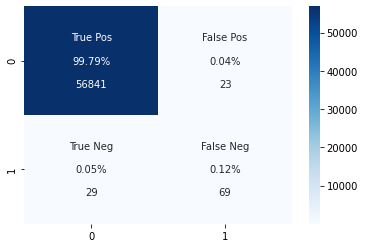

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=perc_and_numerical, fmt='', cmap='Blues')

In [89]:
prec = tp/(tp+fp)

In [90]:
prec

0.75

In [91]:
recall = tp/(tp+fn)
recall

0.7040816326530612

In [93]:
F1 = 2*prec*recall / (prec + recall)
F1

0.7263157894736842

In [96]:
spec = tn/(tn+fp)
spec

0.9995955261676984

In [97]:
# negative predictive value
npv = tn/(tn+fn)
npv

0.9994900650606646

In [98]:
# false negative rate
fnr = fn/(fn+tp)
fnr

0.29591836734693877